In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('bmh')

In [2]:
df = pd.read_csv("EcommerceCustomers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('float64')]

In [5]:
df = df.select_dtypes(include = 'float64')
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


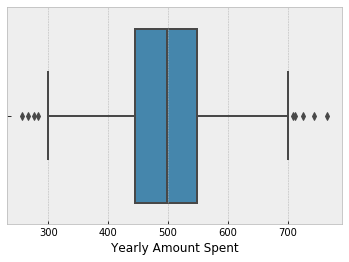

In [6]:
sns.boxplot(x=df['Yearly Amount Spent']);

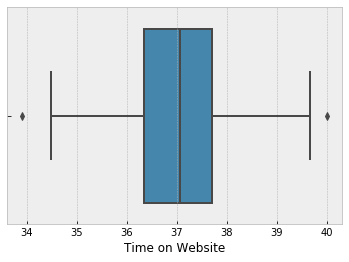

In [7]:
sns.boxplot(x=df['Time on Website']);

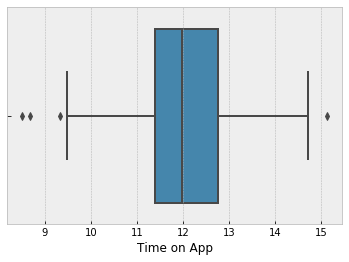

In [8]:
sns.boxplot(x=df['Time on App']);

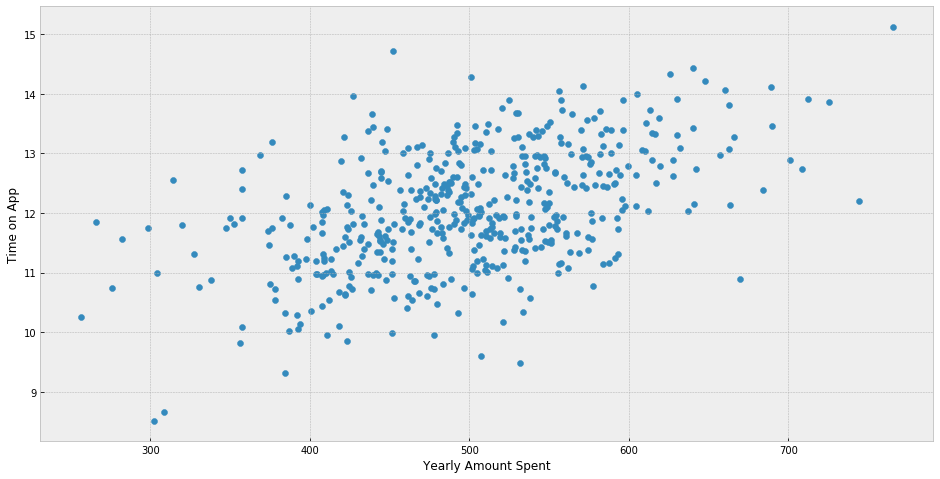

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Yearly Amount Spent'], df['Time on App'])
ax.set_xlabel('Yearly Amount Spent')
ax.set_ylabel('Time on App')
plt.show();

Видны точки за пределами облака

### Z-Score

In [10]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[1.45635117 0.60728003 2.49358859 0.55010651 1.11865385]
 [1.13650215 0.94946372 0.20655573 0.87092735 1.35178302]
 [0.05272322 0.72713923 0.04968115 0.5720669  0.14850091]
 ...
 [0.40987204 0.55685385 1.26018697 1.42726105 0.66013536]
 [0.27159708 0.34124841 0.21829075 1.19904197 0.54072439]
 [0.66842216 0.36882066 1.27732288 0.79967926 0.01937765]]


In [11]:
threshold = 3
print(np.where(z > 3))

(array([ 12,  65,  65, 154, 157, 157, 157, 225, 309, 442, 447], dtype=int64), array([0, 1, 4, 0, 2, 3, 4, 4, 1, 1, 3], dtype=int64))


In [12]:
print(z[442][1])
print(z[65][1])
print(z[12][0])

3.4072364327211604
3.095491009405355
3.5506967429030234


442 и 65 наблюдения в Time on App являются выбросом

12 наблюдение в Avg. Session Length являеися выбросом

### IQR-score

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Avg. Session Length       1.370163
Time on App               1.365696
Time on Website           1.367175
Length of Membership      1.196052
Yearly Amount Spent     104.275551
dtype: float64


Поскольку теперь у нас есть оценки IQR, выберем выбросы. Приведенный ниже код выдаст результат с истинными и ложными значениями. Точка данных с False означает, что эти значения действительны, тогда как True указывает на наличие выброса.

In [15]:
print((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

     Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0                  False        False            False                 False   
1                  False        False            False                 False   
2                  False        False            False                 False   
3                  False        False            False                 False   
4                  False        False            False                 False   
5                  False        False            False                 False   
6                  False        False            False                 False   
7                  False        False            False                 False   
8                  False        False            False                 False   
9                  False        False            False                 False   
10                 False        False            False                 False   
11                 False        False   